In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
from pickle import dump
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
for i in df_train.columns:
    print(i," : ",df_train[i].isnull().sum())

Id  :  0
MSSubClass  :  0
MSZoning  :  0
LotFrontage  :  259
LotArea  :  0
Street  :  0
Alley  :  1369
LotShape  :  0
LandContour  :  0
Utilities  :  0
LotConfig  :  0
LandSlope  :  0
Neighborhood  :  0
Condition1  :  0
Condition2  :  0
BldgType  :  0
HouseStyle  :  0
OverallQual  :  0
OverallCond  :  0
YearBuilt  :  0
YearRemodAdd  :  0
RoofStyle  :  0
RoofMatl  :  0
Exterior1st  :  0
Exterior2nd  :  0
MasVnrType  :  872
MasVnrArea  :  8
ExterQual  :  0
ExterCond  :  0
Foundation  :  0
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinSF1  :  0
BsmtFinType2  :  38
BsmtFinSF2  :  0
BsmtUnfSF  :  0
TotalBsmtSF  :  0
Heating  :  0
HeatingQC  :  0
CentralAir  :  0
Electrical  :  1
1stFlrSF  :  0
2ndFlrSF  :  0
LowQualFinSF  :  0
GrLivArea  :  0
BsmtFullBath  :  0
BsmtHalfBath  :  0
FullBath  :  0
HalfBath  :  0
BedroomAbvGr  :  0
KitchenAbvGr  :  0
KitchenQual  :  0
TotRmsAbvGrd  :  0
Functional  :  0
Fireplaces  :  0
FireplaceQu  :  690
GarageType  :  81
Gara

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
df_train.select_dtypes(include='object').describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


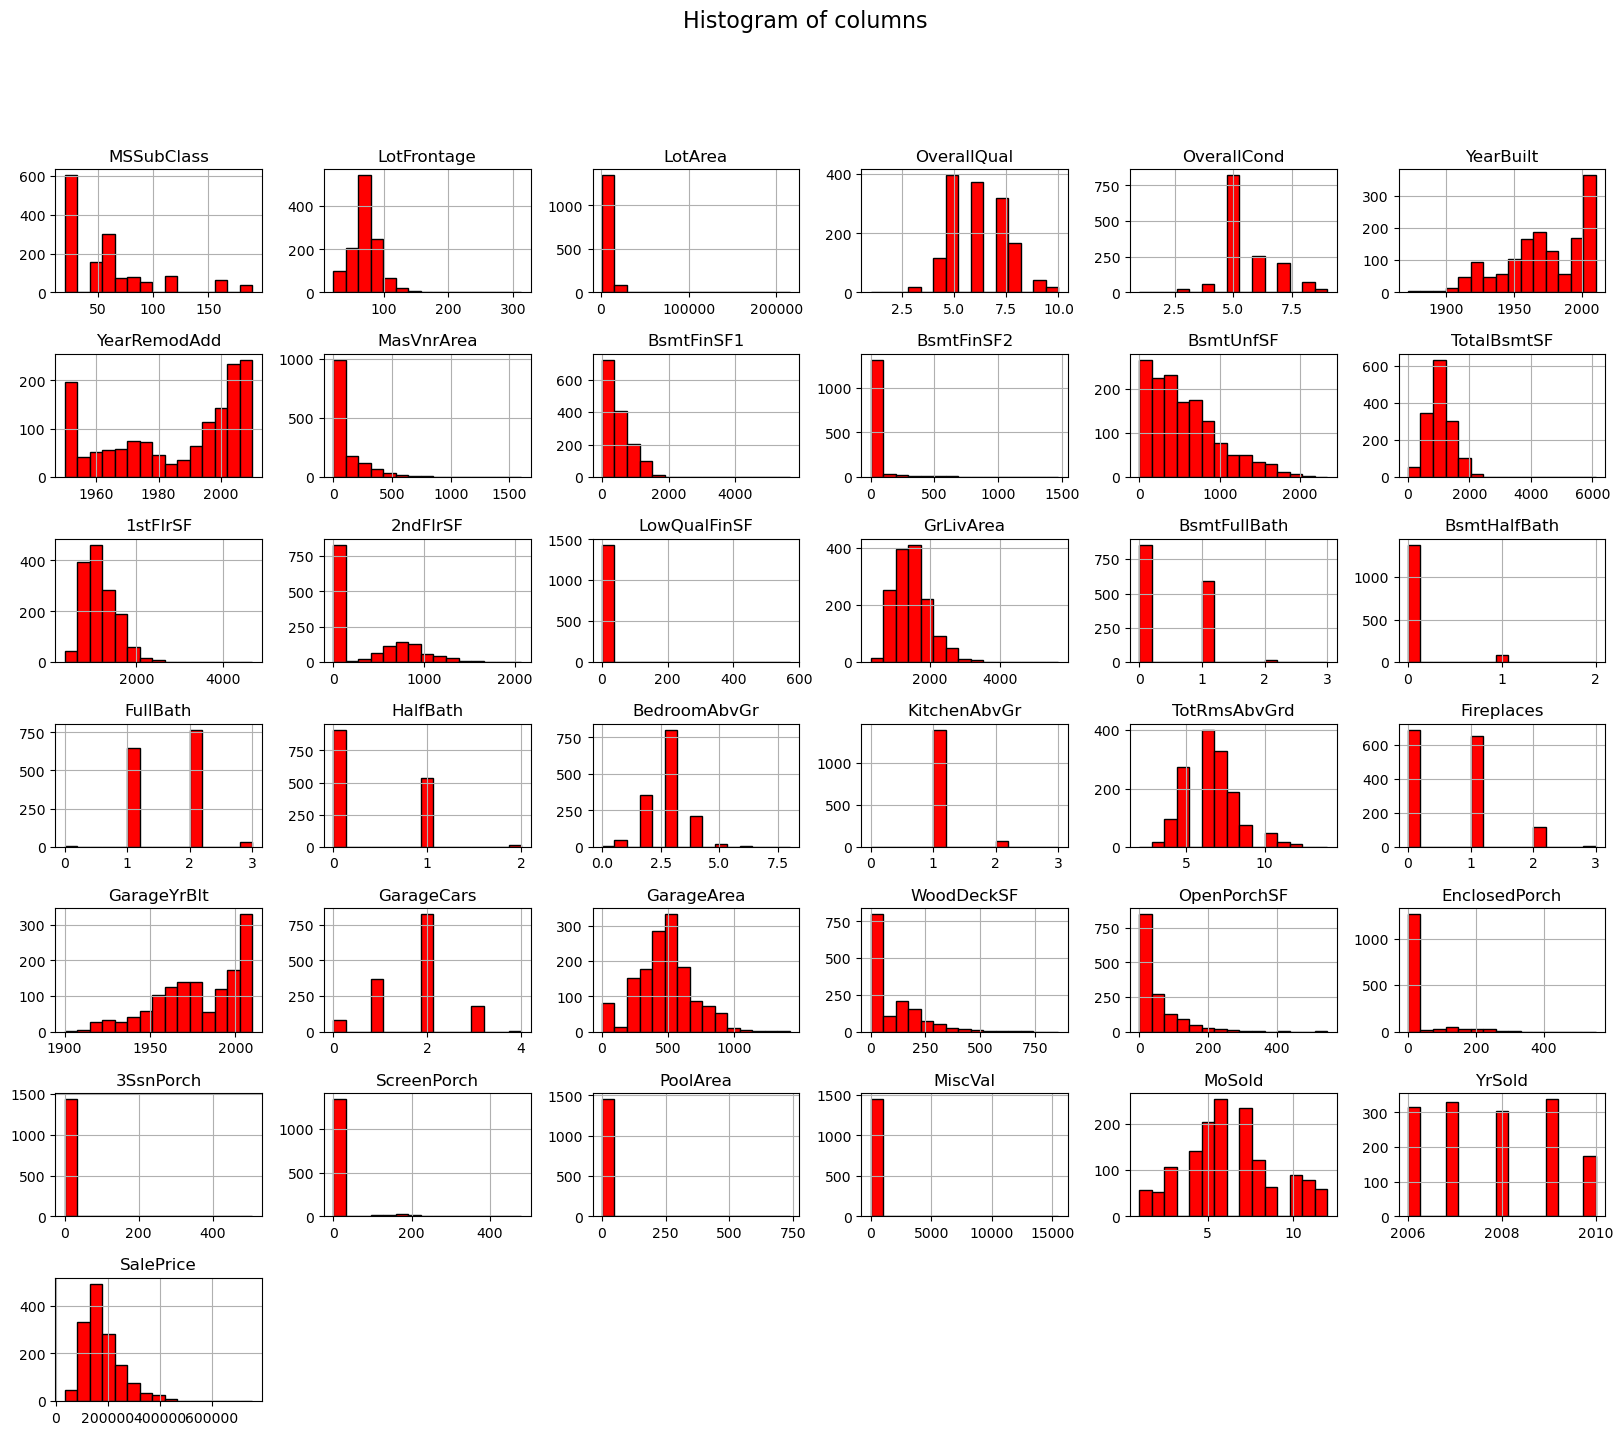

In [10]:
df_train.drop('Id',axis=1).hist(bins=15, figsize=(20,16), color='red', edgecolor='black')
plt.suptitle('Histogram of columns', fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [11]:
df_train['YearRemodAdd'].value_counts()

YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: count, Length: 61, dtype: int64

In [12]:
df_train['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

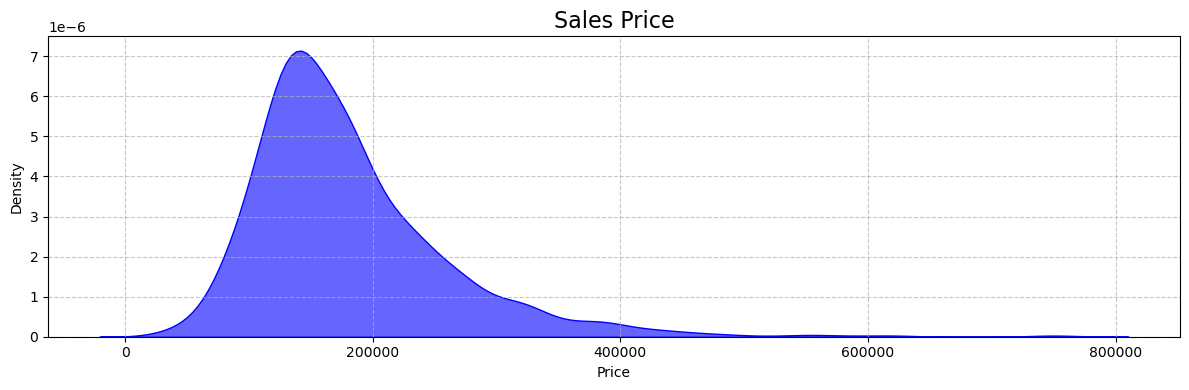

In [13]:
plt.figure(figsize=(12,4))
sns.kdeplot(df_train['SalePrice'], fill=True, color='blue', alpha=0.6)
plt.title(f'Sales Price', fontsize=16)
plt.xlabel('Price',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.grid(True, linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

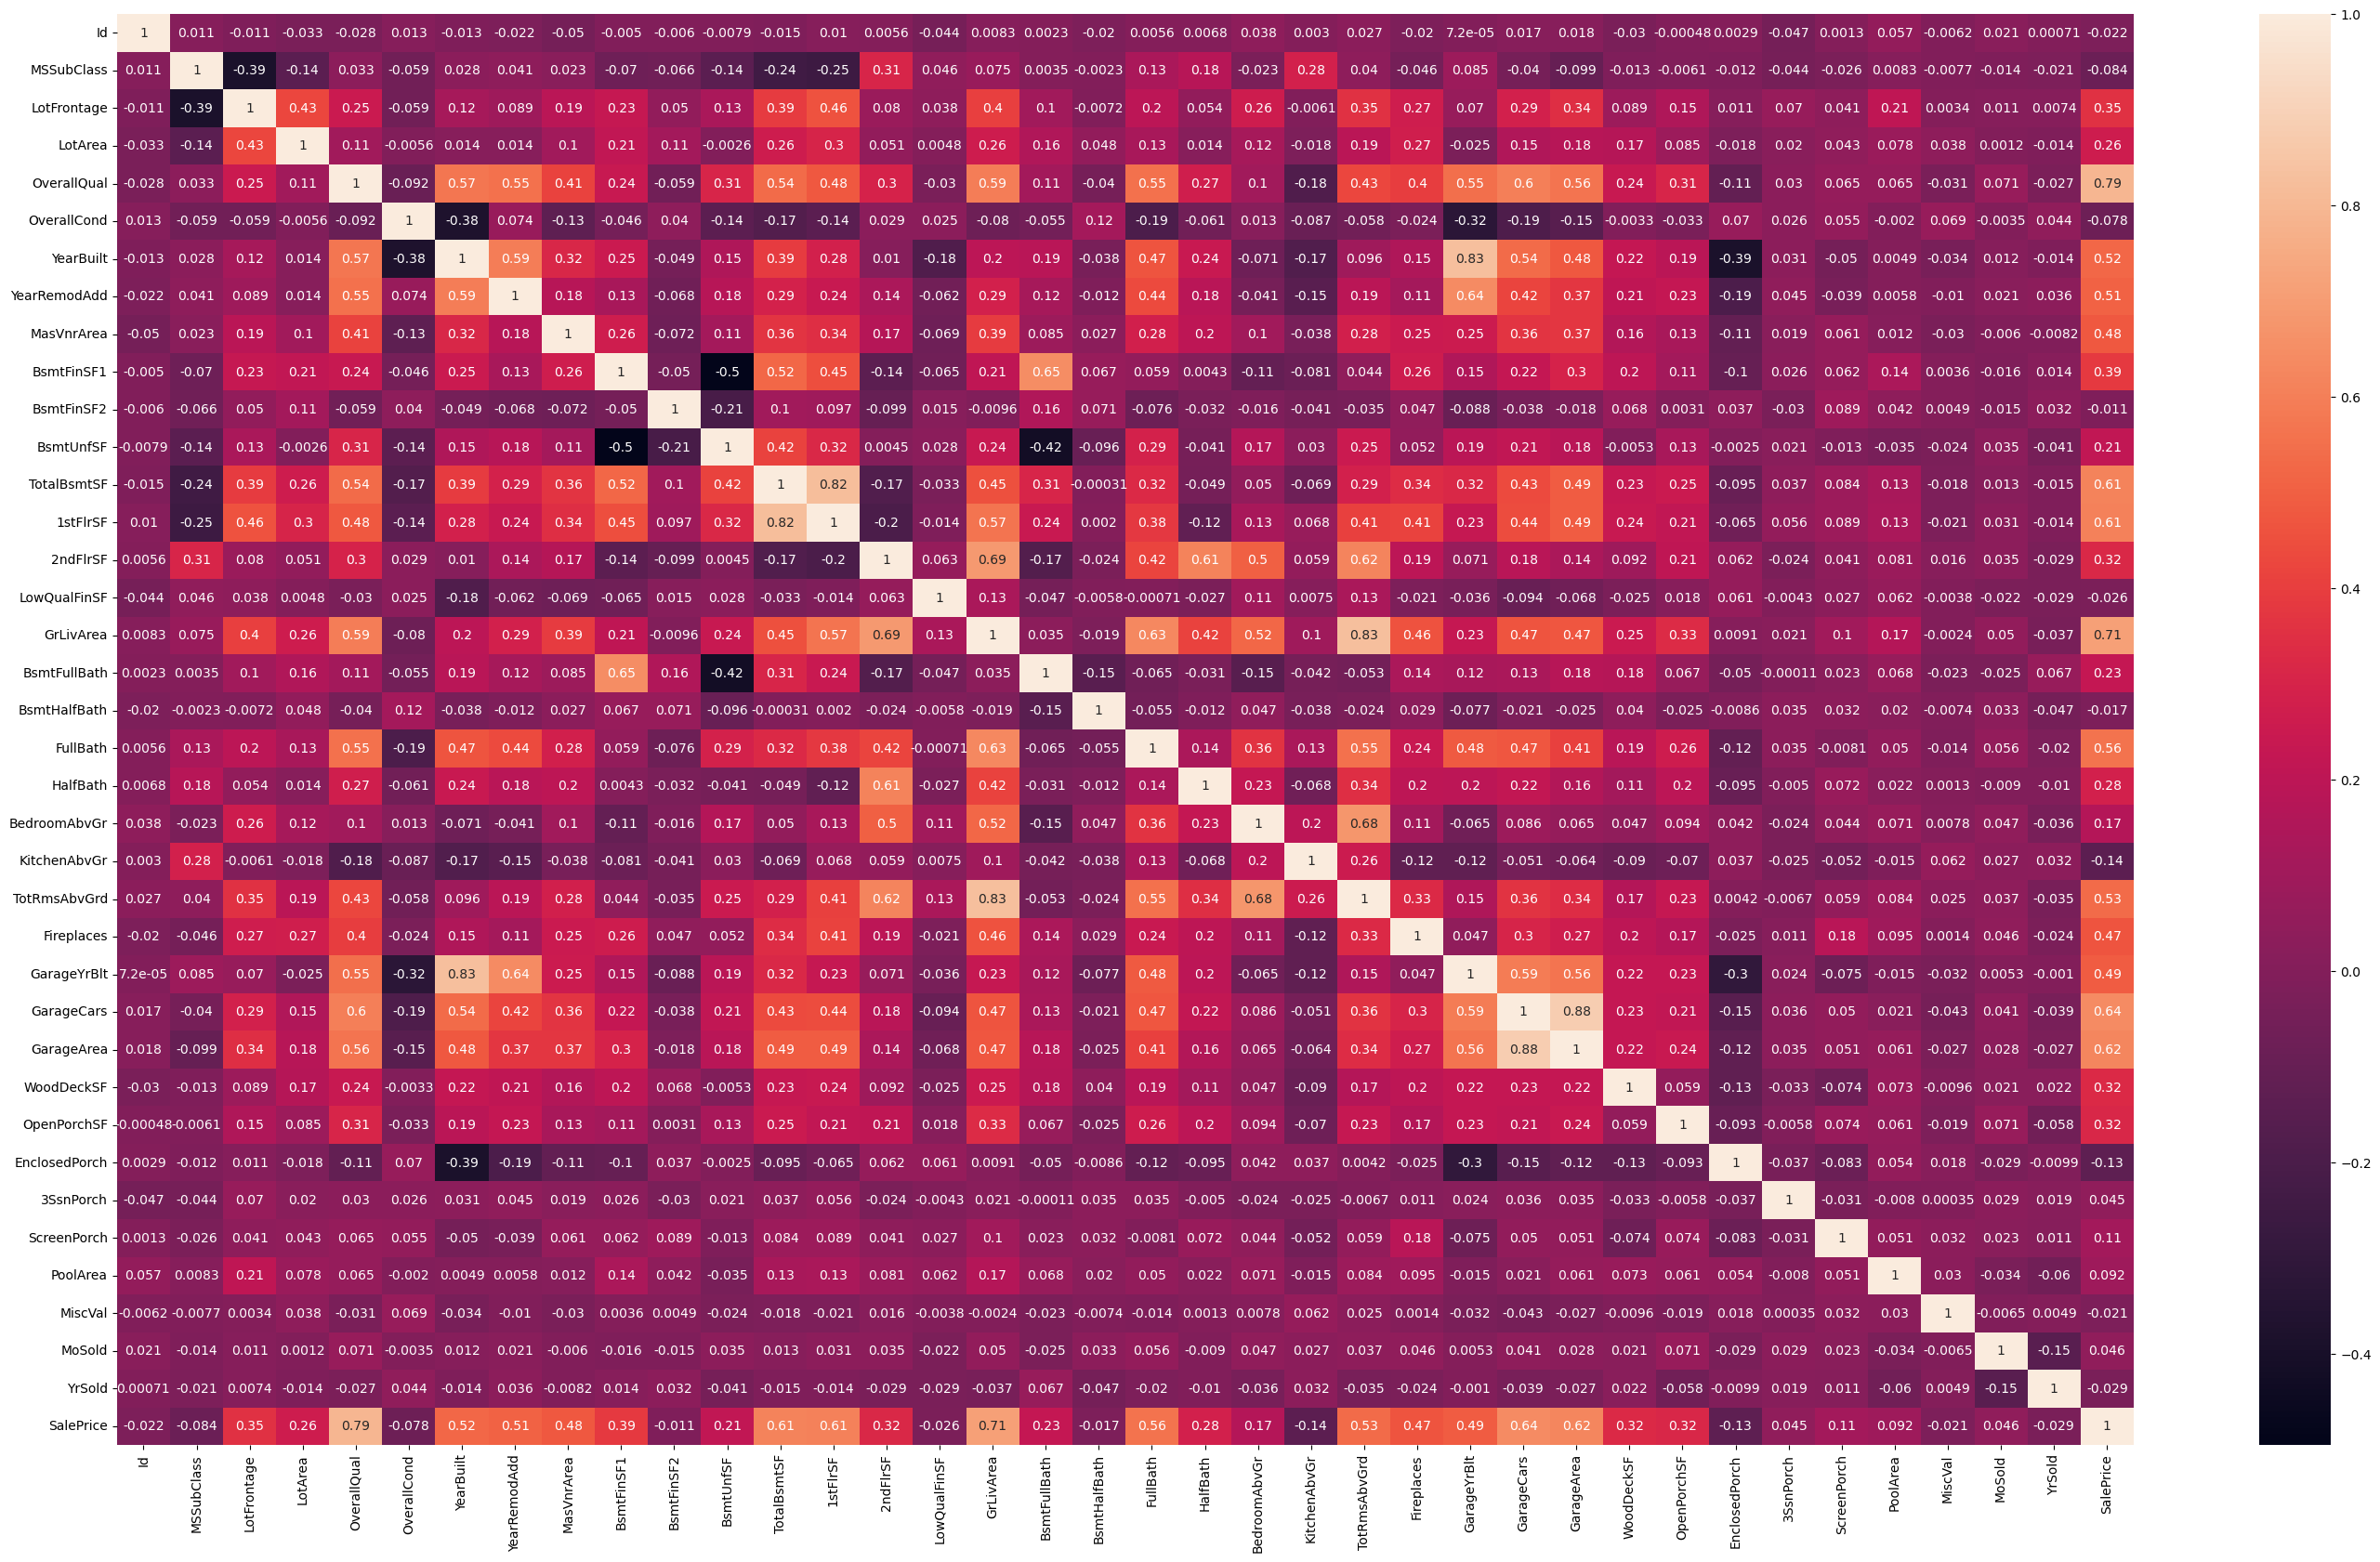

In [14]:
plt.figure(figsize=(35,20))
sns.heatmap(df_train.select_dtypes(include='number').corr(),annot=True)
plt.show()

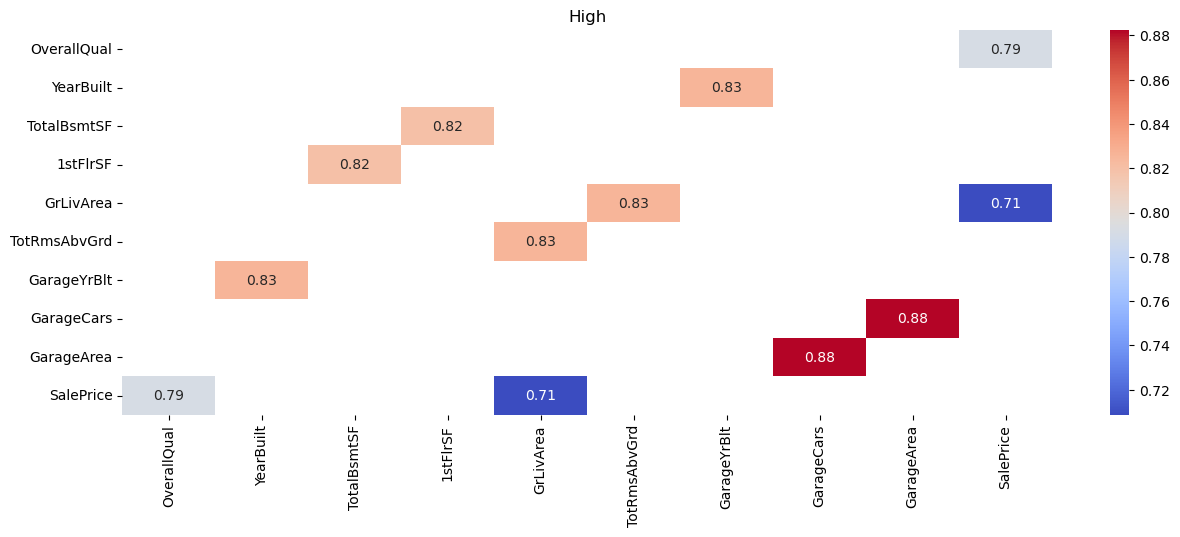

In [15]:
def get_high_corr(df_train, threshold):
    corr = df_train.select_dtypes('number').corr()
    high_corr = corr[(corr >= threshold) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr
# get high positive correlated columns
high_corr = get_high_corr(df_train, 0.7)
# plot high positive correlated columns
plt.figure(figsize=(15, 5))
plot = sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('High')
plt.show()

In [16]:
for i in df_train.columns:
    print(i," : ",df_train[i].isnull().sum())

Id  :  0
MSSubClass  :  0
MSZoning  :  0
LotFrontage  :  259
LotArea  :  0
Street  :  0
Alley  :  1369
LotShape  :  0
LandContour  :  0
Utilities  :  0
LotConfig  :  0
LandSlope  :  0
Neighborhood  :  0
Condition1  :  0
Condition2  :  0
BldgType  :  0
HouseStyle  :  0
OverallQual  :  0
OverallCond  :  0
YearBuilt  :  0
YearRemodAdd  :  0
RoofStyle  :  0
RoofMatl  :  0
Exterior1st  :  0
Exterior2nd  :  0
MasVnrType  :  872
MasVnrArea  :  8
ExterQual  :  0
ExterCond  :  0
Foundation  :  0
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinSF1  :  0
BsmtFinType2  :  38
BsmtFinSF2  :  0
BsmtUnfSF  :  0
TotalBsmtSF  :  0
Heating  :  0
HeatingQC  :  0
CentralAir  :  0
Electrical  :  1
1stFlrSF  :  0
2ndFlrSF  :  0
LowQualFinSF  :  0
GrLivArea  :  0
BsmtFullBath  :  0
BsmtHalfBath  :  0
FullBath  :  0
HalfBath  :  0
BedroomAbvGr  :  0
KitchenAbvGr  :  0
KitchenQual  :  0
TotRmsAbvGrd  :  0
Functional  :  0
Fireplaces  :  0
FireplaceQu  :  690
GarageType  :  81
Gara

In [58]:
for column in df_train.columns:
    SumOfNulls = df_train[column].isnull().sum()
    if SumOfNulls > 30:
        print(f'{column} : {SumOfNulls}')

LotFrontage : 259
Alley : 1369
MasVnrType : 872
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


In [59]:
df_train = df_train.drop(['Id','EnclosedPorch','BsmtHalfBath','LowQualFinSF','MiscFeature','Fence','PoolQC','FireplaceQu'
    ,'3SsnPorch','ScreenPorch','PoolArea','MiscVal','MiscVal','BsmtFinSF2','Fireplaces'],axis=1)

In [60]:
df_train = df_train.dropna()

In [61]:
df_train.shape

(13, 67)

In [62]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
56,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,115,0,8,2009,WD,Abnorml,172500
87,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,Corner,...,TA,TA,Y,0,234,6,2009,New,Partial,164500
115,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,Corner,...,TA,TA,Y,0,32,6,2007,WD,Normal,176000
281,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,120,5,2006,New,Partial,185000
297,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,10,6,2007,WD,Normal,239000


In [63]:
df_train['WoodDeckSF'].value_counts()

WoodDeckSF
0      10
115     1
49      1
206     1
Name: count, dtype: int64

In [64]:
df_train['OpenPorchSF'].value_counts()

OpenPorchSF
0      6
234    2
32     1
120    1
10     1
24     1
48     1
Name: count, dtype: int64

In [65]:
df_train['MasVnrArea'].value_counts()

MasVnrArea
456.0     2
76.0      2
360.0     2
1129.0    1
68.0      1
1600.0    1
335.0     1
894.0     1
212.0     1
180.0     1
Name: count, dtype: int64

In [66]:
df_train['WoodDeckSF'].mean()

28.46153846153846

In [67]:
df_train['MasVnrArea'].mean()

477.0769230769231

In [69]:
# replace 0 wirh 'nan' for train data
from numpy import nan
df_train['WoodDeckSF'] = df_train['WoodDeckSF'].replace(0,nan)
df_train['OpenPorchSF'] = df_train['OpenPorchSF'].replace(0,nan)
df_train['MasVnrArea'] = df_train['MasVnrArea'].replace(0,nan)

In [70]:
mean_WoodDeckSF = df_train['WoodDeckSF'].mean()
df_train['WoodDeckSF'].fillna(mean_WoodDeckSF,inplace=True)
mean_OpenPorchSF = df_train['OpenPorchSF'].mean()
df_train['OpenPorchSF'].fillna(mean_OpenPorchSF,inplace=True)
mean_MasVnrArea = df_train['MasVnrArea'].mean()
df_train['MasVnrArea'].fillna(mean_MasVnrArea,inplace=True)

In [71]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
56,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,115.000000,100.285714,8,2009,WD,Abnorml,172500
87,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,Corner,...,TA,TA,Y,123.333333,234.000000,6,2009,New,Partial,164500
115,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,Corner,...,TA,TA,Y,123.333333,32.000000,6,2007,WD,Normal,176000
281,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,123.333333,120.000000,5,2006,New,Partial,185000
297,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,123.333333,10.000000,6,2007,WD,Normal,239000


In [72]:
df_train.duplicated().sum()

0

In [73]:
df_train['SalePrice'].describe()

count        13.000000
mean     168664.076923
std       28449.288674
min      124500.000000
25%      160000.000000
50%      172500.000000
75%      176000.000000
max      239000.000000
Name: SalePrice, dtype: float64

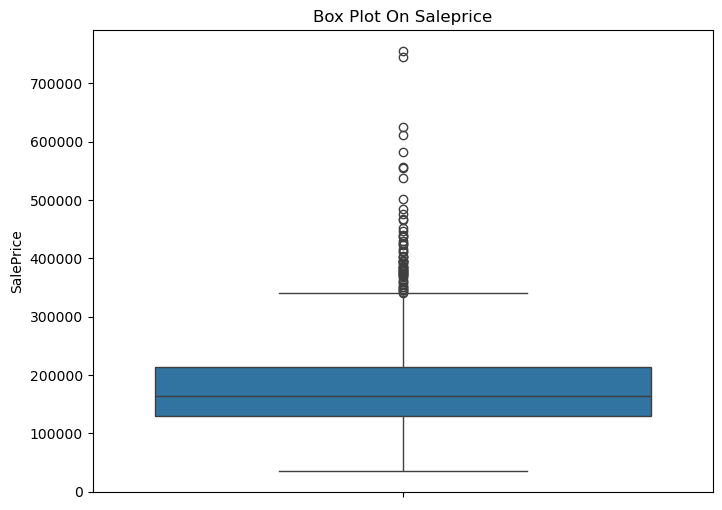

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 6)
sns.boxplot(data=df_train,y="SalePrice",orient="v",ax=axes)
axes.set(ylabel='SalePrice',title="Box Plot On Saleprice")
plt.show()

In [23]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


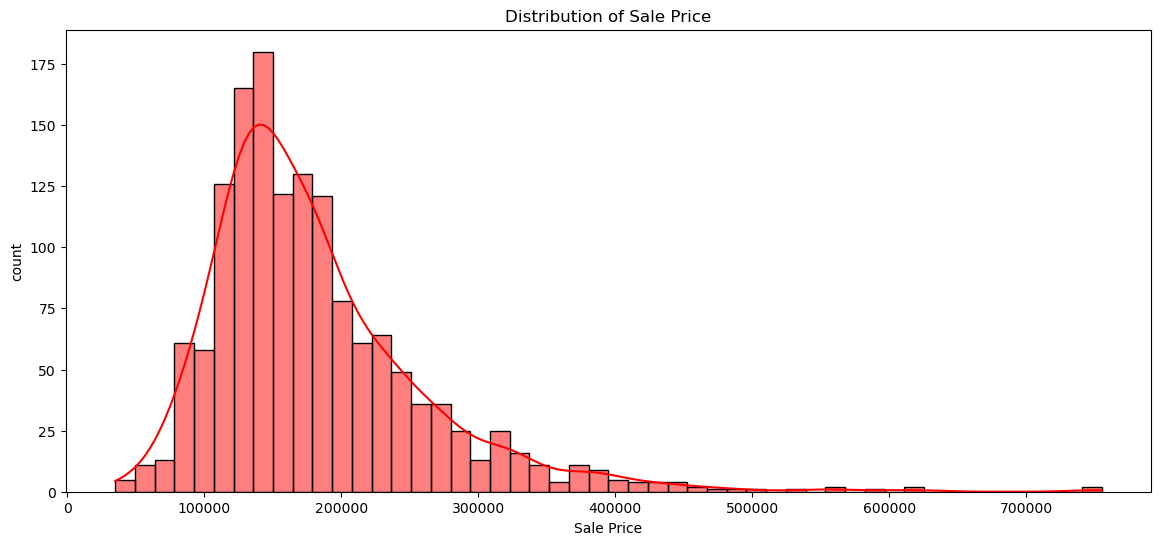


Skewness of Price: 1.88
Kurtosis of Price: 6.54


In [24]:
plt.figure(figsize=(14, 6))
sns.histplot(df_train['SalePrice'], bins=50, kde=True, color='red')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('count')
plt.show()
print(f"\nSkewness of Price: {df_train['SalePrice'].skew():.2f}")
print(f"Kurtosis of Price: {df_train['SalePrice'].kurt():.2f}")

In [25]:
df_train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

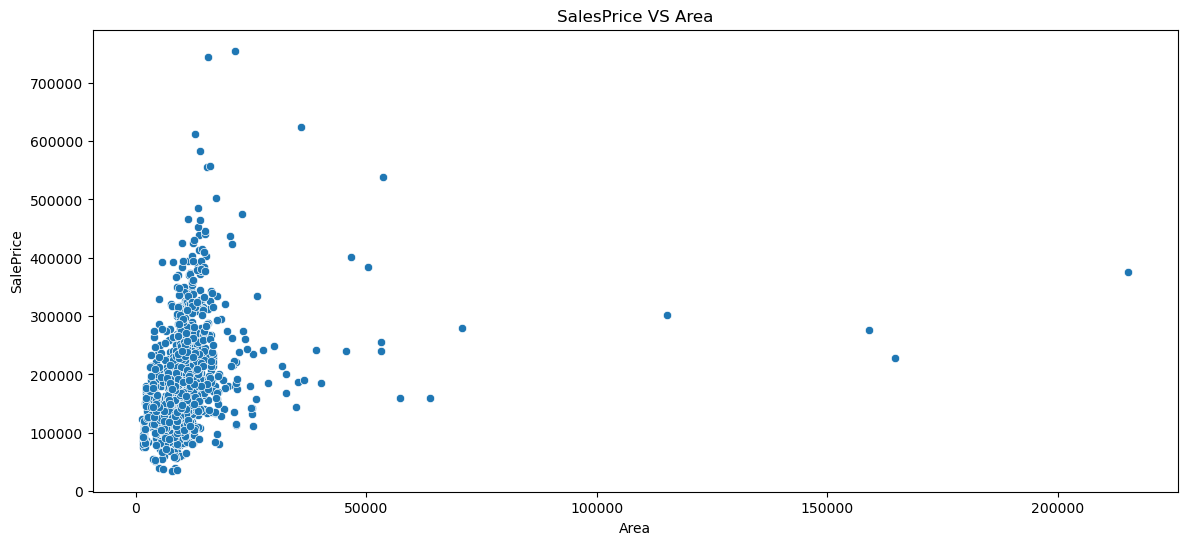

In [29]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='LotArea',y='SalePrice',data=df_train)
plt.title('SalesPrice VS Area')
plt.xlabel('Area')
plt.ylabel('SalePrice')
plt.show()

<Figure size 1400x600 with 0 Axes>

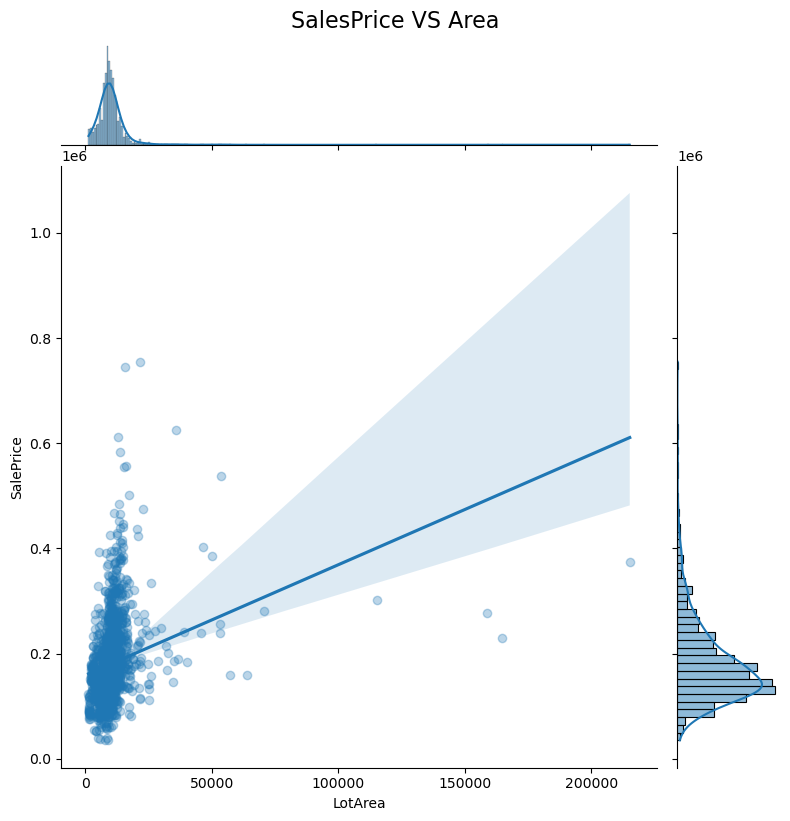

In [32]:
plt.figure(figsize=(14,6))
sns.jointplot(x='LotArea',y='SalePrice',data=df_train,kind='reg',height=8,scatter_kws={'alpha':0.3})
plt.suptitle('SalesPrice VS Area',y=1.02,fontsize=16)
plt.show()

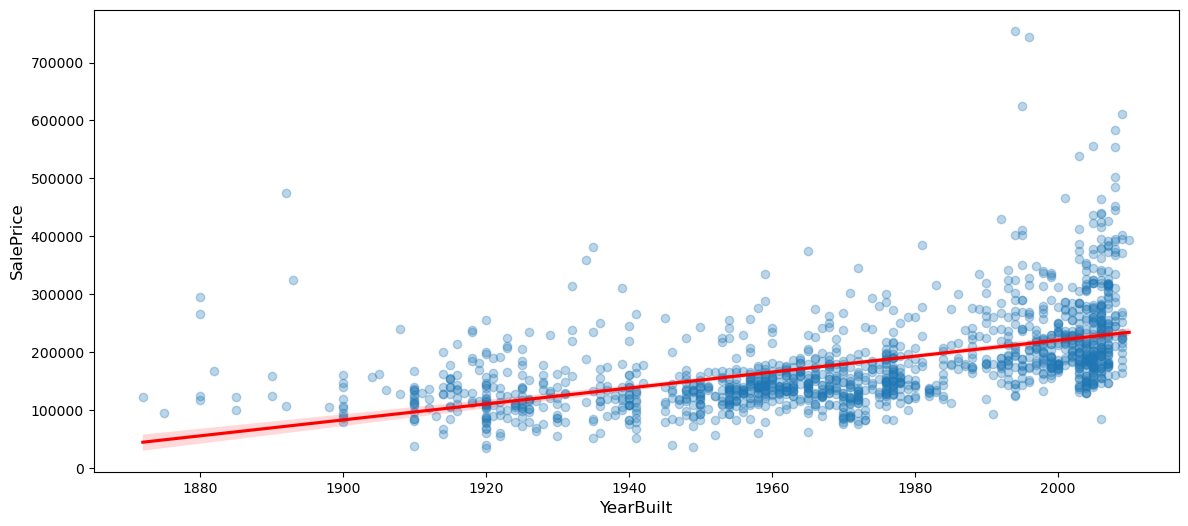

In [37]:
plt.figure(figsize=(14,6))
sns.regplot(x='YearBuilt',y='SalePrice',data=df_train,scatter_kws={'alpha':0.3},line_kws={'color':'red'})
plt.xlabel('YearBuilt',fontsize='12')
plt.ylabel('SalePrice',fontsize='12')
plt.show()

/var/folders/sk/r_5jqbqx4ng_97wn3q21mp880000gn/T/ipykernel_29408/642059538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TotRmsAbvGrd',data=df_train, palette='viridis')


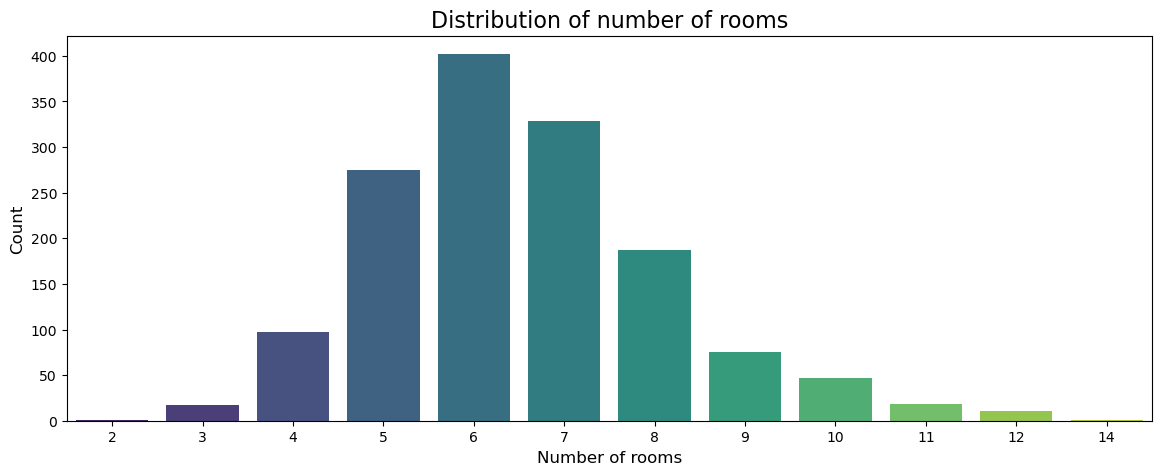

In [43]:
plt.figure(figsize=(14,5))
sns.countplot(x='TotRmsAbvGrd',data=df_train, palette='viridis')
plt.title('Distribution of number of rooms',fontsize=16)
plt.xlabel('Number of rooms',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()